![netflix_header](netflix_header.png)


# 1. Netflix Top 10: Analyzing Weekly Chart-Toppers

This dataset comprises Netflix's weekly top 10 lists for the most-watched TV shows and films worldwide. The data spans from June 28, 2021, to August 27, 2023.

This workspace is pre-loaded with two CSV files. 
- `netflix_top10.csv` contains columns such as `show_title`, `category`, `weekly_rank`, and several view metrics.
- `netflix_top10_country.csv` has information about a show or film's performance by country, contained in the columns `cumulative_weeks_in_top_10` and `weekly_rank`.

We've added some guiding questions for analyzing this exciting dataset! Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells. 

[Source: Netflix](https://www.netflix.com/tudum/top10/united-states?week=2023-08-27) 

## 2. Explore this dataset

To get you started with your analysis...
1. Combine the different categories of top 10 lists in a single weekly top 10 list spanning all categories
2. Are there consistent trends or patterns in the content format (tv, film) that make it to the top 10 over different weeks or months?
3. Explore your country's top 10 trends. Are there unique preferences or regional factors that set your country's list apart from others?
4. Visualize popularity ranking over time through time series plots

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
%matplotlib inline
sns.set_style('whitegrid')


Load the Data
We'll load the datasets netflix_top10_country.csv and netflix_top10.csv into our environment.

In [31]:
# Load the datasets
df_country = pd.read_csv('netflix_top10_country.csv')
df_global = pd.read_csv('netflix_top10.csv')


## 3. Explore the Data
Let's understand the structure and contents of the datasets.

### 3.1. Explore df_country

In [32]:
# Display the first 5 rows
df_country.head()


,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2023-08-27,Films,1,On the Line,NaN,1
1,Argentina,AR,2023-08-27,Films,2,Half Brothers,NaN,2
2,Argentina,AR,2023-08-27,Films,3,Street Kings,NaN,3
3,Argentina,AR,2023-08-27,Films,4,You Are So Not Invited to My Bat Mitzvah,NaN,1
4,Argentina,AR,2023-08-27,Films,5,Heart of Stone,NaN,3


In [33]:
# Check data types and missing values
df_country.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210880 entries, 0 to 210879
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                210880 non-null  object
 1   country_iso2                210880 non-null  object
 2   week                        210880 non-null  object
 3   category                    210880 non-null  object
 4   weekly_rank                 210880 non-null  int64 
 5   show_title                  210880 non-null  object
 6   season_title                101935 non-null  object
 7   cumulative_weeks_in_top_10  210880 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 12.9+ MB


### 3.2. Explore df_global


In [34]:
df_global.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2023-08-27,Films (English),1,The Monkey King,NaN,23200000,1.6167,14400000.0,2,False,NaN
1,2023-08-27,Films (English),2,Heart of Stone,NaN,28500000,2.1000,13600000.0,3,False,NaN
2,2023-08-27,Films (English),3,You Are So Not Invited to My Bat Mitzvah,NaN,21300000,1.7333,12300000.0,1,False,NaN
3,2023-08-27,Films (English),4,Street Kings,NaN,10300000,1.8167,5700000.0,2,False,NaN
4,2023-08-27,Films (English),5,The Boss Baby,NaN,9000000,1.6333,5500000.0,10,False,NaN


In [ ]:
#Explore the misising values
df_global.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week                        4520 non-null   object 
 1   category                    4520 non-null   object 
 2   weekly_rank                 4520 non-null   int64  
 3   show_title                  4520 non-null   object 
 4   season_title                2187 non-null   object 
 5   weekly_hours_viewed         4520 non-null   int64  
 6   runtime                     440 non-null    float64
 7   weekly_views                440 non-null    float64
 8   cumulative_weeks_in_top_10  4520 non-null   int64  
 9   is_staggered_launch         4520 non-null   bool   
 10  episode_launch_details      17 non-null     object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 357.7+ KB


## 4. Data Cleaning
Clean the data by handling missing values, correcting data types, and dropping unnecessary columns.

### 4.1. Handling Missing Values

In [36]:
# Check for missing values in df_global
df_global.isnull().sum()


week                             0
category                         0
weekly_rank                      0
show_title                       0
season_title                  2333
weekly_hours_viewed              0
runtime                       4080
weekly_views                  4080
cumulative_weeks_in_top_10       0
is_staggered_launch              0
episode_launch_details        4503
dtype: int64

### 4.2. Dropping Unnecessary Columns

In [40]:
# Drop 'episode_launch_details' and 'is_staggered_launch' as they're not needed
columns_to_drop = ['episode_launch_details', 'is_staggered_launch']
for col in columns_to_drop:
    if col in df_global.columns:
        df_global.drop(columns=col, inplace=True)


### Correcting Data Types

In [41]:
# Convert 'week' columns to datetime
df_country['week'] = pd.to_datetime(df_country['week'])
df_global['week'] = pd.to_datetime(df_global['week'])


### 4.4 Verifying Cleaning Steps


In [42]:
# Verify data types
df_global.dtypes


week                          datetime64[ns]
category                              object
weekly_rank                            int64
show_title                            object
season_title                          object
weekly_hours_viewed                    int64
runtime                              float64
weekly_views                         float64
cumulative_weeks_in_top_10             int64
dtype: object

## 5. Feature Engineering
Create relevant features to aid our analysis.

### 5.1. Categorize Content Type

In [43]:
# Add 'content_type' based on 'category'
def get_content_type(category):
    if 'Film' in category:
        return 'Film'
    elif 'TV' in category:
        return 'TV Show'
    else:
        return 'Other'

df_global['content_type'] = df_global['category'].apply(get_content_type)


### 5.2. Create Duration Categories

In [44]:
# Define bins and labels
bins = [0, 1.5, 2.5, df_global['runtime'].max()]
labels = ['Short (<1.5 hrs)', 'Medium (1.5-2.5 hrs)', 'Long (>2.5 hrs)']

# Apply bins to 'runtime'
df_global['duration_category'] = pd.cut(df_global['runtime'], bins=bins, labels=labels, include_lowest=True)


### 5.3. Calculate Total Content Duration

For TV Shows, we'll estimate total duration by assuming runtime represents the duration per episode.

In [ ]:
import re

# Extract season number if possible
def extract_season_number(season_title):
    if isinstance(season_title, str):  # Check if it's a string
        match = re.search(r'Season (\d+)', season_title)
        if match:
            return int(match.group(1))
        else:
            return np.nan
    else:  # Handle non-string values (e.g., NaN)
        return np.nan  # Or some other appropriate value

df_global['season_number'] = df_global['season_title'].apply(extract_season_number)

## 6. Analysis
Perform statistical analysis and visualizations to explore the relationship.

### 6.1. Runtime Distribution

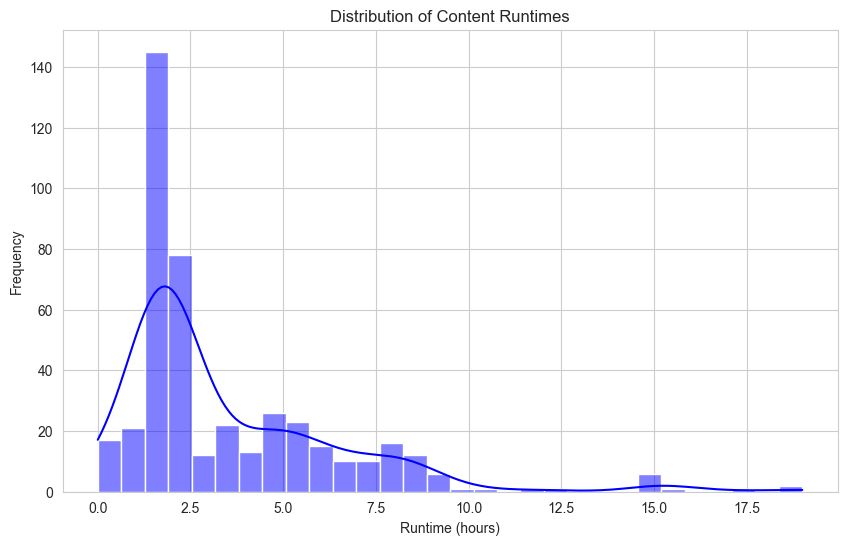

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(df_global['runtime'], bins=30, kde=True, color='blue')
plt.title('Distribution of Content Runtimes')
plt.xlabel('Runtime (hours)')
plt.ylabel('Frequency')
plt.show()


### 6.2. Relationship Between Runtime and Weekly Rank
We can analyze this separately for Films and TV Shows.

#### 6.2.1. For Films

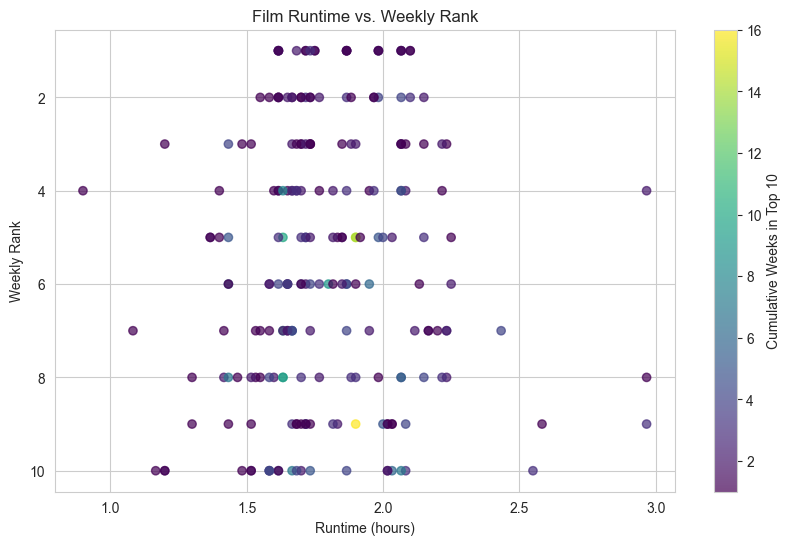

In [55]:
# Filter films
df_films = df_global[df_global['content_type'] == 'Film']

plt.figure(figsize=(10,6))

# Create scatter plot using Matplotlib
sc = plt.scatter(
    x=df_films['runtime'],
    y=df_films['weekly_rank'],
    c=df_films['cumulative_weeks_in_top_10'],
    cmap='viridis',
    alpha=0.7
)

plt.title('Film Runtime vs. Weekly Rank')
plt.xlabel('Runtime (hours)')
plt.ylabel('Weekly Rank')
plt.gca().invert_yaxis()  # Rank 1 at the top

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Cumulative Weeks in Top 10')

plt.show()

#### 6.3.2. For TV Shows

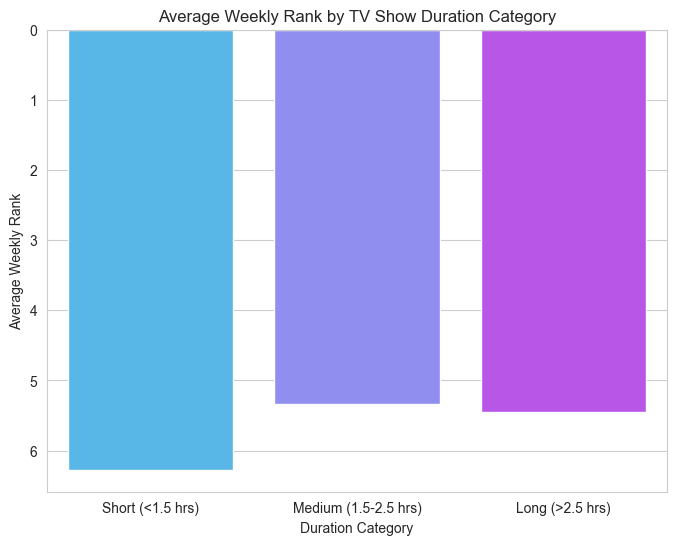

In [69]:
tv_rank_by_duration = df_global.groupby('duration_category', observed=False)['weekly_rank'].mean().reset_index()  # Added observed=False

plt.figure(figsize=(8, 6))
sns.barplot(data=tv_rank_by_duration, x='duration_category', y='weekly_rank', hue='duration_category', palette='cool', legend=False)  # Added hue and legend=False
plt.title('Average Weekly Rank by TV Show Duration Category')
plt.xlabel('Duration Category')
plt.ylabel('Average Weekly Rank')
plt.gca().invert_yaxis()
plt.show()

## Correlation Analysis

In [70]:
def calculate_total_duration(row):
    if not row['is_tv_show']:
        # For films, total duration is the runtime
        return row['runtime']
    else:
        # Avoid division by zero or NaN
        if pd.notnull(row['weekly_views']) and row['weekly_views'] > 0:
            # Estimate total duration
            return row['weekly_hours_viewed'] / row['weekly_views'] * 60  # Convert hours to minutes
        else:
            # Assign NaN or some default value
            return np.nan  # or you could set a default value based on average duration
# Apply the updated function
df_global['total_duration'] = df_global.apply(calculate_total_duration, axis=1)

# Drop rows with NaN 'total_duration'
netflix_top10_clean = df_global.dropna(subset=['total_duration', 'weekly_rank'])

from scipy.stats import spearmanr

corr, p_value = spearmanr(netflix_top10_clean['total_duration'], netflix_top10_clean['weekly_rank'])

print(f"Spearman Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")



Spearman Correlation Coefficient: -0.05
P-value: 0.3048


## Interpretation of Results

Correlation Coefficient: Indicates the strength and direction of the relationship.

*A negative value suggests longer content tends to have higher rankings (since rank 1 is the highest)*.

P-value: Determines statistical significance.

*A p-value less than 0.05 suggests the correlation is statistically significant.*


## Distribution Of Content Duration

This helps us understand the common duration ranges for content that makes it to the Top 10.

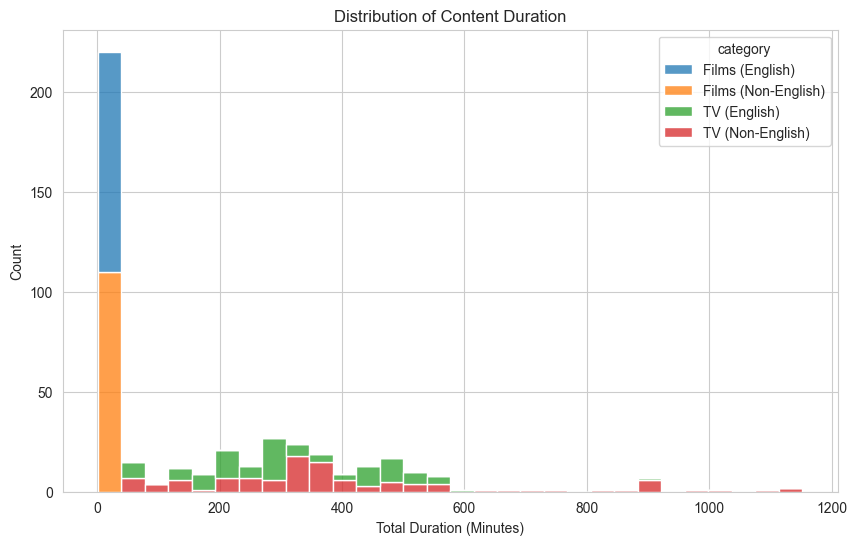

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(data= df_global, x='total_duration', bins=30, hue='category', multiple='stack')
plt.title('Distribution of Content Duration')
plt.xlabel('Total Duration (Minutes)')
plt.ylabel('Count')
plt.show()


## Duration By Category 

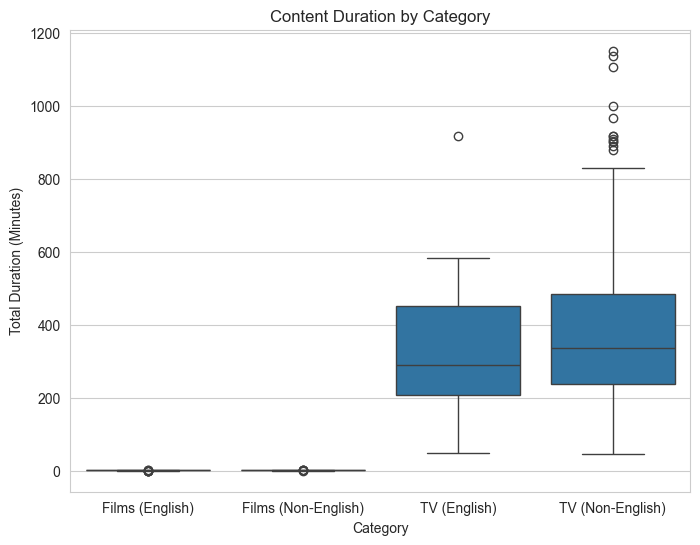

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_global, x='category', y='total_duration')
plt.title('Content Duration by Category')
plt.xlabel('Category')
plt.ylabel('Total Duration (Minutes)')
plt.show()


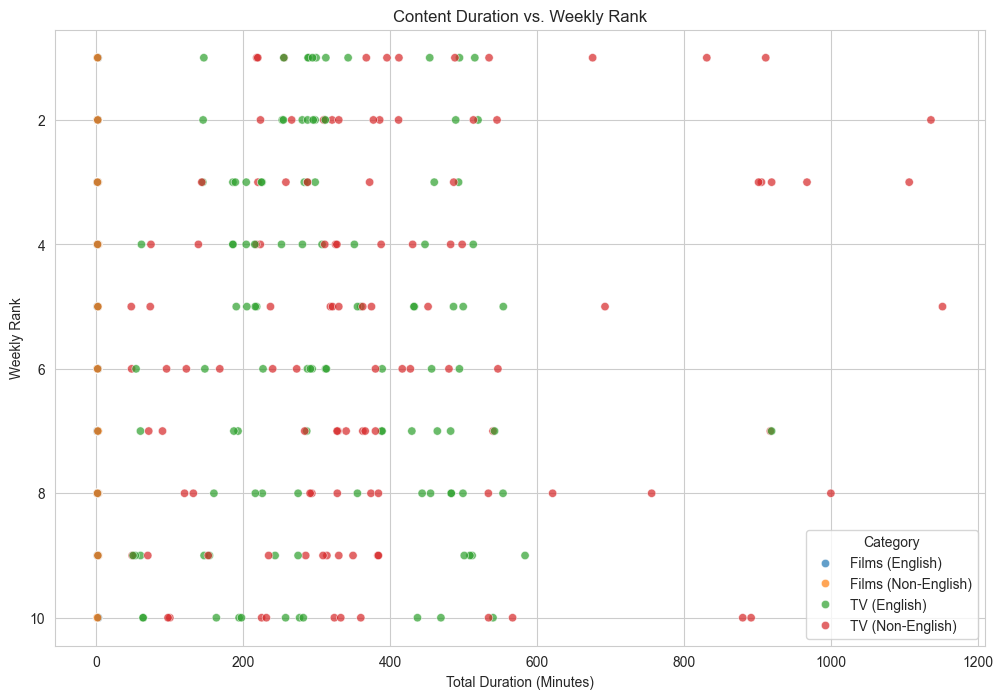

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(data= df_global, x='total_duration', y='weekly_rank', hue='category', alpha=0.7)
plt.title('Content Duration vs. Weekly Rank')
plt.xlabel('Total Duration (Minutes)')
plt.ylabel('Weekly Rank')
plt.gca().invert_yaxis()  # Higher ranks at the top
plt.legend(title='Category')
plt.show()
